In [12]:
import requests
import csv
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib

In [13]:
url_page = 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

page = requests.get(url_page).text
soup = BeautifulSoup(page, "lxml")

table = soup.find("table", {'id': 'ctl00_Contenido_tblÍndices'})
name = ""
porcent = ""
nroFila = 0

In [14]:
for fila in table.find_all("tr"):
    #for row in  tabla.find_all("td")::
    nroCelda=0
    for celda in fila.find_all('td'):
        if nroCelda==0:
            name=celda.text
            print("Nombre:", name)
        if nroCelda==3:
            porcent=celda.text
            print("Porcentaje de Dif:", porcent)
        nroCelda+=1
    nroFila+=1

Nombre: IBEX 35®
Porcentaje de Dif: 0,14
Nombre: IBEX 35® con Dividendos
Porcentaje de Dif: 0,14
Nombre: IBEX MEDIUM CAP®
Porcentaje de Dif: 0,13
Nombre: IBEX SMALL CAP®
Porcentaje de Dif: 0,45
Nombre: IBEX 35® Bancos
Porcentaje de Dif: 0,93
Nombre: IBEX 35® Energía
Porcentaje de Dif: -0,43
Nombre: IBEX 35® Construcción
Porcentaje de Dif: 0,23
Nombre: IBEX TOP Dividendo®
Porcentaje de Dif: 0,47
Nombre: IBEX 35® con Dividendos Netos
Porcentaje de Dif: 0,14
Nombre: IBEX 35® Inverso
Porcentaje de Dif: -0,14
Nombre: IBEX 35® Doble Inverso
Porcentaje de Dif: -0,29
Nombre: IBEX 35® Inverso X3
Porcentaje de Dif: -0,41
Nombre: IBEX 35® Inverso X5
Porcentaje de Dif: -0,69
Nombre: IBEX 35® Inverso X10
Porcentaje de Dif: -1,38
Nombre: IBEX 35® Doble Apalancado
Porcentaje de Dif: 0,28
Nombre: IBEX 35® Doble Apalancado Bruto
Porcentaje de Dif: 0,27
Nombre: IBEX 35® Doble Apalancado Neto
Porcentaje de Dif: 0,28
Nombre: IBEX 35® Apalancado X3
Porcentaje de Dif: 0,41
Nombre: IBEX 35® Apalancado Neto X

In [15]:
with open('bolsa_ibex35.csv', 'a', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, porcent])
csv_file.close()

In [16]:
df = pd.read_csv('bolsa_ibex35.csv')

headerList= ["Name" , "Porcentaje"]

df.to_csv('bolsa_ibex35.csv',header=headerList, index=False)
df

,Name,Porcentaje
0,IBEX 35®,"0,14"
1,IBEX 35® con Dividendos,"0,14"
2,IBEX MEDIUM CAP®,"0,13"
3,IBEX SMALL CAP®,"0,45"
4,IBEX 35® Bancos,"0,93"
...,...,...
74,Índice TEF Inverso X5,"-7,32"
75,Índice SAN Inverso X5,"-4,18"
76,Índice BBVA Inverso X5,"-2,69"
77,Índice ITX Inverso X5,"-0,08"


<AxesSubplot:ylabel='Porcentaje'>

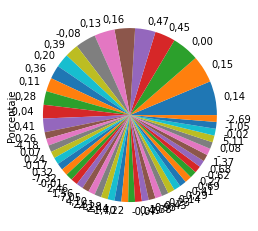

In [17]:
serie=df.Porcentaje.value_counts()
serie.plot.pie()